Name: Yamini M
Roll No: 24BAD131
Linear Regression Performance
MSE: 180.20325784639058
RMSE: 13.423980700462534
R2 Score: 0.15936864293487973
                                               Coefficient
lunch_standard                                    4.408310
race/ethnicity_group E                            2.064914
race/ethnicity_group D                            1.661925
parental level of education_bachelor's degree     1.133131
parental level of education_master's degree       0.464298
race/ethnicity_group C                            0.424199
attendance                                        0.246510
sleep_hours                                       0.131499
study_hours                                       0.026519
race/ethnicity_group B                           -0.058513
parental level of education_some college         -0.357635
parental level of education_some high school     -1.259741
parental level of education_high school          -1.866596
gender_male                     

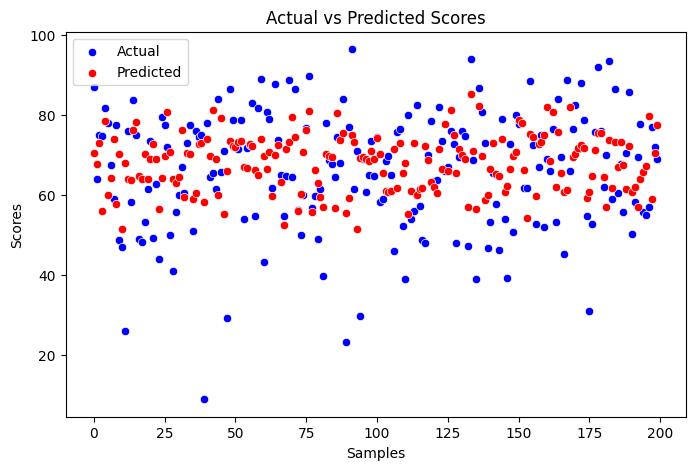

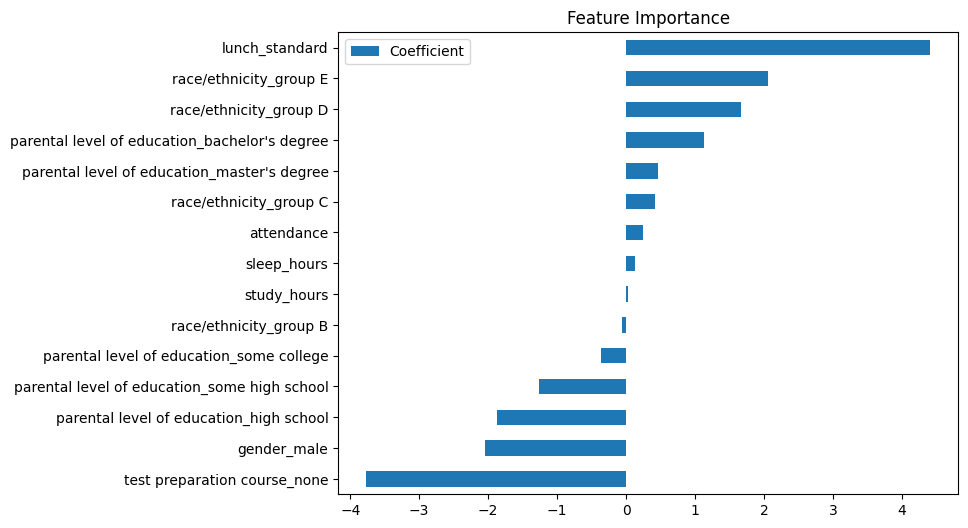

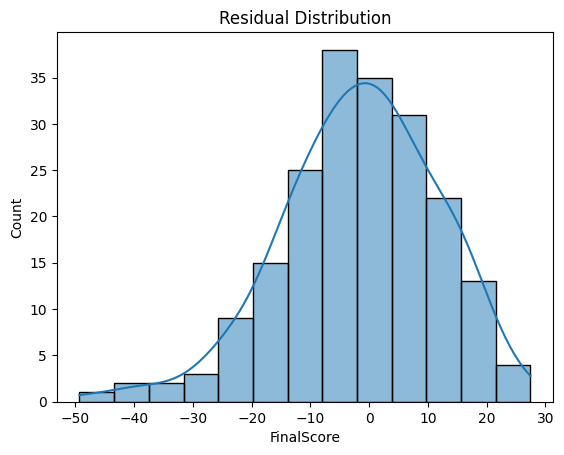

In [2]:
print("Name: Yamini M")
print("Roll No: 24BAD131")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("StudentsPerformance.csv")

df["FinalScore"] = df[["math score", "reading score", "writing score"]].mean(axis=1)

df["study_hours"] = np.random.randint(1, 5, size=len(df))
df["attendance"] = np.random.randint(60, 100, size=len(df))
df["sleep_hours"] = np.random.randint(5, 9, size=len(df))

df = pd.get_dummies(df, drop_first=True)

df.fillna(df.mean(numeric_only=True), inplace=True)

X = df.drop(columns=["math score", "reading score", "writing score", "FinalScore"])
y = df["FinalScore"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance")
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

coeff_df = pd.DataFrame(lr.coef_, index=X.columns, columns=["Coefficient"])
print(coeff_df.sort_values(by="Coefficient", ascending=False))

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

print("Ridge R2:", r2_score(y_test, ridge.predict(X_test)))
print("Lasso R2:", r2_score(y_test, lasso.predict(X_test)))

results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

plt.figure(figsize=(8,5))
sns.scatterplot(x=results.index, y="Actual", data=results, color="blue", label="Actual")
sns.scatterplot(x=results.index, y="Predicted", data=results, color="red", label="Predicted")
plt.xlabel("Samples")
plt.ylabel("Scores")
plt.title("Actual vs Predicted Scores")
plt.legend()
plt.show()

coeff_df.sort_values(by="Coefficient").plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance")
plt.show()

sns.histplot(y_test - y_pred, kde=True)
plt.title("Residual Distribution")
plt.show()


Name: Yamini M
Roll No: 24BAD131
Degree: 2
MSE: 18.41696779601779
RMSE: 4.291499481069267
R2: 0.6391701147013311
Degree: 3
MSE: 18.460267222224626
RMSE: 4.296541309265469
R2: 0.6383217814053861
Degree: 4
MSE: 18.268226874853184
RMSE: 4.274134634619409
R2: 0.6420842844016577
Ridge R2 (Degree 4): 0.6417265483369174


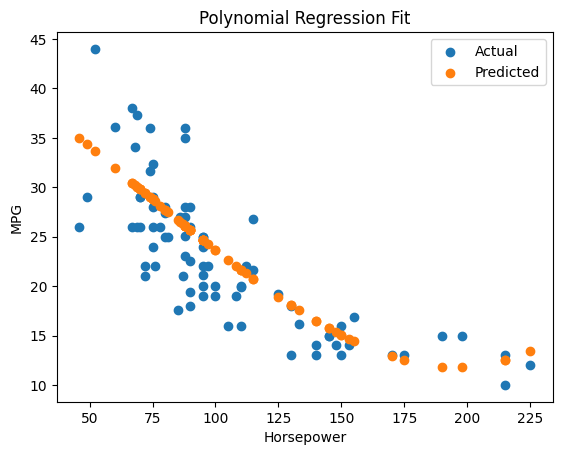

In [ ]:
print("Name: Yamini M")
print("Roll No: 24BAD131")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("auto-mpg.csv")

df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")
df.dropna(subset=["horsepower", "mpg"], inplace=True)

X = df[["horsepower"]]
y = df["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = [2, 3, 4]

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    scaler = StandardScaler()
    X_train_poly = scaler.fit_transform(X_train_poly)
    X_test_poly = scaler.transform(X_test_poly)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("Degree:", d)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2:", r2)

poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

ridge = Ridge(alpha=10)
ridge.fit(X_train_poly, y_train)
y_pred_ridge = ridge.predict(X_test_poly)

print("Ridge R2 (Degree 4):", r2_score(y_test, y_pred_ridge))

plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, y_pred_ridge, label="Predicted")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.show()
